# Problem Set 2, due September 18 at 11:59pm

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [225]:
import os 
import pandas as pd
pd.set_option('display.max_columns',0)

path = os.getcwd()
progresa = pd.read_csv(path+'/progresa_sample.csv', sep=',')
demo_vars = ['sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n', 'min_dist',
       'dist_cap', 'poor', 'progresa', 'hohedu', 'hohwag', 'welfare_index',
       'hohsex', 'hohage', 'age', 'grc97', 'sc97']
avgs = progresa[demo_vars].mean()
std = progresa[demo_vars].std()
progressa_descr = pd.concat([avgs, std], axis=1)
progressa_descr.columns = ['mean', 'std']
progressa_descr.sort_index(inplace=True)
progressa_descr

,mean,std
age,11.366,3.168
dist_cap,147.674,76.063
dist_sec,2.419,2.234
fam_n,7.216,2.353
grc,3.964,2.499
grc97,3.705,2.572
hohage,44.437,11.620
hohedu,2.768,2.656
hohsex,0.925,0.263
hohwag,586.985,788.134


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [226]:
import scipy.stats as stats
pd.set_option('display.float_format', lambda x: '%.3f' % x)

progresa.dropna(axis=0, inplace=True)
demo_vars = ['sex', 'indig', 'dist_sec', 'sc', 'grc', 'fam_n', 'min_dist',
       'dist_cap', 'hohedu', 'hohwag', 'welfare_index',
       'hohsex', 'hohage', 'age', 'grc97', 'sc97']

progresa_pobre97 = progresa[(progresa['year']==97) & (progresa['poor']=='pobre')]
progresa_pobre97_cntrl = progresa_pobre97[progresa_pobre97['progresa']=='0']
progresa_pobre97_treat = progresa_pobre97[progresa_pobre97['progresa']=='basal']

demog_means = progresa_pobre97.groupby(['progresa']).mean().reset_index().transpose()
demog_means.columns = ['control', 'treatment']
demog_means.drop(['year','progresa'], inplace=True)
demog_means['diff'] = demog_means['treatment'] - demog_means['control']
demog_means['p'] = 0.0

for var in demo_vars:
    t, p =stats.ttest_ind(progresa_pobre97_cntrl[var], progresa_pobre97_treat[var], equal_var=True)
    demog_means.loc[var, 'p'] = p 

# demog_means = demog_means.reset_index()
demog_means = demog_means.sort_index().reset_index()
demog_means.columns = ['Variable name', 'Average value (Treatment villages)', 'Average value (Control villages)', 
                      'Difference (Treat - Control)', 'p-value']
demog_means

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,age,10.786,10.744,-0.042,0.248
1,dist_cap,154.492,151.801,-2.691,0.003
2,dist_sec,2.401,2.400,-0.001,0.967
3,fam_n,7.303,7.281,-0.022,0.424
4,folnum,19327.970,19447.379,119.409,0.000
5,grc,3.734,3.709,-0.024,0.395
6,grc97,3.734,3.709,-0.024,0.395
7,hohage,44.271,43.631,-0.639,0.000
8,hohedu,2.661,2.727,0.066,0.026
9,hohsex,0.923,0.926,0.002,0.478


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

**QA** : Yes with a p-value of 0.05 we find that nine of the demographic variables show a statistical difference between treatment villages and control villages at the baseline before treatment is applied.

**QB** : These differences matter because if they exist before treatment, then they may play a role in whether or not the child is enrolled in school. Therefore we cannot confidentally say that it is the intervention of Progresa which is affecting school enrollment and not extraneous factors.

**QC** : To measure the impact of the treatment effectively, we should take into consideration these factors which currently are showing stastical differences as a control variables by using regression to look at treatment effects of Progresa

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

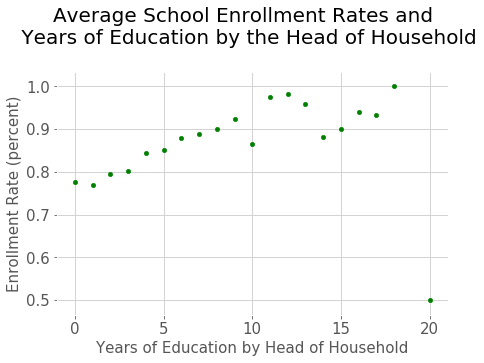

In [227]:
from matplotlib import pyplot as plt

progresa_97 = progresa[progresa['year']==97] 
hohedu97_enrollment = progresa_97.groupby('hohedu').mean()['sc'].reset_index(name='sc')
                                   
fig = plt.figure(figsize=(7,5))
ax = fig.gca()
plt.style.use('ggplot')
ax.grid(color='lightgray', linestyle='-', linewidth=1)
fig.suptitle('Average School Enrollment Rates and \n Years of Education by the Head of Household', fontsize = 20)

ax.scatter(hohedu97_enrollment['hohedu'], hohedu97_enrollment['sc'], color='green', s=20)

ax.set_facecolor('white')
plt.xlabel('Years of Education by Head of Household', fontsize=15)
plt.ylabel('Enrollment Rate (percent)', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplots_adjust(bottom = None, top = 0.8)
plt.show()

This scatter plot shows that generally as the amount of education the head of households has, the more likely they are to enroll their children in school. There is a drop off for those heads of household who have 20 years of education. This is most likely because there were only two children whose heads of houses had 20 years of education. 

We do see a sharp drop around households with 10 and 14 years of education. It's hard to tell why this could have occurred. One hypothesis worth looking into is that this could be because there is a divide between those who successfully finish highed school or college and those who dropped out half way. Drop outs which occur right before graduating may not send their children on to pursue education because they themselves did not finish. However, for households who go on to complete these higher educations do continue to send their children on to school.

### 1.5 Graphical exploration, part 2

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

Average rate of enrollment for poor households in the treatment group before treatment in 1997: 0.822696523152761
Average rate of enrollment for poor households in the treatment group after treatment in 1998: 0.849257030578411


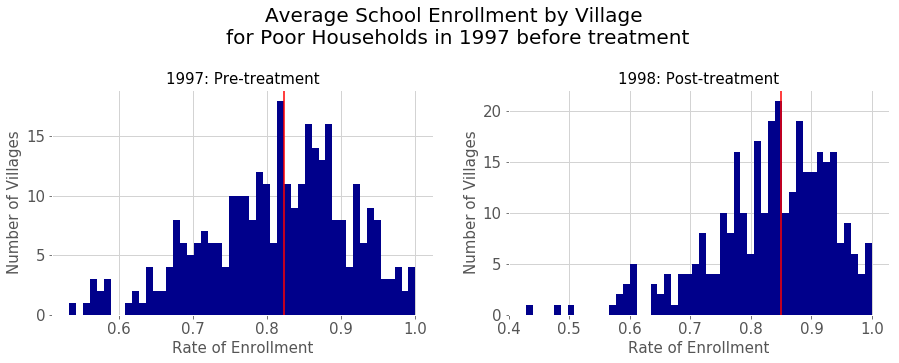

In [511]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  
from matplotlib import gridspec

pobre97_sc_village = progresa_pobre97_treat.groupby('village').mean()['sc'].reset_index(name='sc')

progresa_pobre98 = progresa[(progresa['year']==98) & (progresa['poor']=='pobre')]
progresa_pobre98_treat = progresa_pobre98[progresa_pobre98['progresa']=='basal']
pobre98_sc_village = progresa_pobre98_treat.groupby('village').mean()['sc'].reset_index(name='sc')

print('Average rate of enrollment for poor households in the treatment group before treatment in 1997:', progresa_pobre97_treat['sc'].mean())
print('Average rate of enrollment for poor households in the treatment group after treatment in 1998:', progresa_pobre98_treat['sc'].mean()
     )
# Make a combined graph of 1997 and 1998 data
bins = 50

fig = plt.figure(figsize=(15,5))
fig.suptitle('Average School Enrollment by Village \n'
            'for Poor Households in 1997 before treatment', fontsize = 20)

# 1997 Histogram
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], height_ratios=[1])
ax0 = plt.subplot(gs[0])
plt.style.use('ggplot')
ax0.grid(color='lightgray', linestyle='-', linewidth=1)
ax0.set_title('1997: Pre-treatment', fontsize=15)

ax0.hist(pobre97_sc_village['sc'], bins, facecolor='darkblue')
ax0.axvline(x=progresa_pobre97_treat['sc'].mean(), color='r', linestyle='-')

ax0.set_facecolor('white')
plt.xlabel('Rate of Enrollment', fontsize=15)
plt.ylabel('Number of Villages', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplots_adjust(bottom = None, top = 0.8)

# 1998 Histogram
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], height_ratios=[1])
ax1 = plt.subplot(gs[1])
plt.style.use('ggplot')
ax1.grid(color='lightgray', linestyle='-', linewidth=1)
ax1.set_title('1998: Post-treatment', fontsize=15)

ax1.hist(pobre98_sc_village['sc'], bins, facecolor='darkblue')
ax1.axvline(x=progresa_pobre98_treat['sc'].mean(), color='r', linestyle='-')

ax1.set_facecolor('white')
plt.xlabel('Rate of Enrollment', fontsize=15)
plt.ylabel('Number of Villages', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplots_adjust(bottom = None, top = 0.75)

plt.show()
    

In [519]:
t, p =stats.ttest_ind(pobre97_sc_village['sc'], pobre98_sc_village['sc'], equal_var=True)
print('T-test results comparing poor villages in the treatment group before and after treatment report a T-value of',
     t, 'and p=', p)

T-test results comparing poor villages in the treatment group before and after treatment report a T-value of -2.5636087966 and p= 0.0105877397216


A qualitatively assessment of the histograms of villages pre-treatment and post-treatment seems to show that there is a positive shift of the mean resulting in a left-skew graph.

A quantitative assesment using a t-test results in a p-value of ~0.01 signifying that with repeated experimention, there is an approximately 1% chance of finding a positive 2.7% shift in enrollment equal to the one observed in this experiment. Therefore we can confidentally say that, yes, there was a different in enrollment statistics for these poor villages. However, nothing can be said about if Progresa resulted in this difference or if is a trend that occured naturally between 1997 and 1998.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [394]:
import scipy.stats as stats
progresa = pd.read_csv(path+'/progresa_sample.csv', sep=',')
progresa.dropna(axis=0, inplace=True)

progresa_pobre98 = progresa[(progresa['year']==98) & (progresa['poor']=='pobre')]
progresa_pobre98_treat = progresa_pobre98[progresa_pobre98['progresa']=='basal']
progresa_pobre98_control = progresa_pobre98[progresa_pobre98['progresa']=='0']

print('Average rate of enrollment for poor households in the treatment group after Progresa in 1998:', progresa_pobre98_treat['sc'].mean())
print('Average rate of enrollment for poor households in the control group in 1998:', progresa_pobre98_control['sc'].mean())
print('This is an average difference of enrollment between treatment and control vilages of',
     progresa_pobre98_treat['sc'].mean()-progresa_pobre98_control['sc'].mean(),'%')

print('\n')
t, p =stats.ttest_ind(progresa_pobre98_treat['sc'], progresa_pobre98_control['sc'], equal_var=True)
print('T-test results comparing poor villages in the treatment group before and after treatment report a T-value of',
     t, 'and  p=', p)


Average rate of enrollment for poor households in the treatment group after Progresa in 1998: 0.849257030578411
Average rate of enrollment for poor households in the control group in 1998: 0.810923092511906
This is an average difference of enrollment between treatment and control vilages of 0.03833393806650498 %


T-test results comparing poor villages in the treatment group before and after treatment report a T-value of 8.1016503053 and  p= 5.65645560536e-16


Results of the t-test between control villages in 1998 and the post-treatment villages show that there is a statistically significant different of p << 0.001.

From this analysis we show that between the control villages and treatment villages, it appears that Progresa may have had a positive effect on enrollment rate with its implementation. An even better analysis would be to compare the treatment villages before treatment to the control villages before treatment and make sure that they do not statistically differ from each other.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [415]:
import statsmodels.formula.api as smf
pd.options.mode.chained_assignment = None 
progresa = pd.read_csv(path+'/progresa_sample.csv', sep=',')
progresa.dropna(axis=0, inplace=True)

progresa_pobre98 = progresa[(progresa['year']==98) & (progresa['poor']=='pobre')]

progresa_pobre98_model = smf.ols(formula='sc ~ progresa', data = progresa_pobre98).fit()
print(progresa_pobre98_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.64
Date:                Sun, 17 Sep 2017   Prob (F-statistic):           5.66e-16
Time:                        17:36:13   Log-Likelihood:                -11171.
No. Observations:               26155   AIC:                         2.235e+04
Df Residuals:                   26153   BIC:                         2.236e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8109      0.00

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
    - Progresa increased the likilhood of a child enrolling in school by 3.8%
* How does your regression estimate compare to your t-test estimate from part 2.1?
    - This regression estimate is the same as the one found from 2.1. This is expected because we are testing the same set of data, which is treatment vs control villages during 1998 after the intervention of Progresa
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
    - No, from our very first t-test performed across demographic variables in villages pre and post treatment, we noticed that some of these metrics were stastically significant. Therefore it is advisable to use a regression to control for these variables.
* What is the counterfactual assumption underlying this regression?
    - The counterfactual assumption is that the enrollment rate of the treatment villages with Progresa  intervention in 1998 would be equal to the control villages' enrollment rates in 1998.

### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [459]:
progresa_pobre98_model2 = smf.ols(formula='sc ~ progresa + hohage + hohedu + dist_cap', data = progresa_pobre98).fit()
print(progresa_pobre98_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     176.0
Date:                Sun, 17 Sep 2017   Prob (F-statistic):          4.41e-149
Time:                        18:31:29   Log-Likelihood:                -10857.
No. Observations:               26155   AIC:                         2.172e+04
Df Residuals:                   26150   BIC:                         2.176e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8306      0.01

* How do the controls affect the point estimate of treatment effect?
    - Adding controls raised the intercept value for average enrollment rate without Progresa intervention (83%). However, they reduced the effects Progresa had on increasing enrollment rate (3.7%)
* How do the controls affect the standard error on the treatment effect? 
    - The standard error rate for the average affect of Progresa did not change as a result of adding control variables. (Although I would have expected it to decrease showing more accuracy with the introduction of control variables)
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
    - The intercept for baseline enrollment rate increased slightly. This is simply due to the addition of the control variables which will change the intercept value. The addition of control variables should decrease the effect of Progresa because the regression is taking these variables into account as outside forces that also affect enrollment rate. Since we do see this decrease, these control variables are responsible for at least some part of increasing enrollment rate. This is because I specifically chose control variables which I had noticed from Question 1.2 showed statistical differences between pre and post treatment. Theoretically if I had chosen control variables that were not significant, then I should see the effect from Progresa remain approximately the same.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [534]:
progresa = pd.read_csv(path+'/progresa_sample.csv', sep=',')
progresa.dropna(axis=0, inplace=True)

progresa_pobre97 = progresa[(progresa['year']==97) & (progresa['poor']=='pobre')]
progresa_pobre97_treat = progresa_pobre97[progresa_pobre97['progresa']=='basal']
progresa_pobre97_cntrl = progresa_pobre97[progresa_pobre97['progresa']=='0']

progresa_pobre98 = progresa[(progresa['year']==98) & (progresa['poor']=='pobre')]
progresa_pobre98_treat = progresa_pobre98[progresa_pobre98['progresa']=='basal']
progresa_pobre98_cntrl = progresa_pobre98[progresa_pobre98['progresa']=='0']

tmp1 = progresa_pobre97_treat['sc'].mean() - progresa_pobre98_treat['sc'].mean()
tmp2 = progresa_pobre97_cntrl['sc'].mean() - progresa_pobre98_cntrl['sc'].mean()

print('The average difference in enrollment rates post-treatment in treatement villages is' , tmp1)
print('The average difference in enrollment rates post-treatment in control villages is' , tmp2)
print('The difference between treatment and control village changes in enrollment over this time period is', tmp2-tmp1)


# Drop individuals who did not make it into 1998 survey
treat_diff = pd.merge(progresa_pobre97_treat[['folnum', 'sc', 'progresa']], progresa_pobre98_treat[['folnum', 'sc', 'progresa']], on='folnum')
treat_diff.columns = ['folnum', 'sc97', 'progresa97', 'sc98', 'progresa98']
treat_diff['treat_diff'] = treat_diff['sc97']-treat_diff['sc98']
# treat_diff_mean = treat_diff['sc97'].mean() - treat_diff['sc98'].mean()

cntrl_diff = pd.merge(progresa_pobre97_cntrl[['folnum', 'sc', 'progresa']], progresa_pobre98_cntrl[['folnum', 'sc', 'progresa']], on='folnum')
cntrl_diff.columns = ['folnum', 'sc98', 'progresa97', 'sc97', 'progresa98']
cntrl_diff['treat_diff'] = cntrl_diff['sc97']-cntrl_diff['sc98']

print('\n')
print('If we remove individuals who dropped out due to attrition the values are as follows:')
print('The average difference in enrollment rates post-treatment in treatement villages is' ,treat_diff.mean()['treat_diff'])
print('The average difference in enrollment rates post-treatment in control villages is' ,cntrl_diff.mean()['treat_diff'])
print('The difference between treatment and control village changes in enrollment over this time period is', treat_diff.mean()['treat_diff']-cntrl_diff.mean()['treat_diff'])


The average difference in enrollment rates post-treatment in treatement villages is -0.02656050742564997
The average difference in enrollment rates post-treatment in control villages is 0.004142465805002105
The difference between treatment and control village changes in enrollment over this time period is 0.030702973230652075


If we remove individuals who dropped out due to attrition the values are as follows:
The average difference in enrollment rates post-treatment in treatement villages is 0.0228417045315
The average difference in enrollment rates post-treatment in control villages is -0.0570473198906
The difference between treatment and control village changes in enrollment over this time period is 0.0798890244221


This analysis shows that there is an average increase of enrollment by 2.3%. The overall impact though with the difference-in-difference has an impact of 3% increase in enrollment. In comparison to our simple effects calculation, we saw an incrase of 3.83% between post-treatment control villages and post-treatment treatment villages. We can see from this difference-in-difference calculation that there was no change in enrollment in control villages during this time. Therefore we can say with confidence that the intent of the intervention was successful, which was to raise enrollment.

If we remove individuals who dropped out due to attrition (around 3000 individuals) we can see that enrollment rates only increase 2% on average with Progressa seemingly. However, taken into account that the rate of control villages actually dropped by 5.7% we notice that overall Progresa appears to have made a 8% impact on enrollment which is even higher than if we had not accounted for individuals who dropped out.

The counterfactual assumption is that without the intervention of Progresa (and not accounting for attrition), the treament villages in 1998 would also have seen on average no change in enrollment rates

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [545]:
import numpy as np

progresa = pd.read_csv(path+'/progresa_sample.csv', sep=',')
progresa.dropna(axis=0, inplace=True)

progresa_pobre = progresa[progresa['poor']=='pobre']
# Create a dummy that has 1 for if in treatment group and in 1998 (post-treatment period)
progresa_pobre['progresa'] = np.where(progresa_pobre['progresa']=='basal', 1, 0)
progresa_pobre['time_dummy'] = np.where(progresa_pobre['year']==98, 1, 0)

DiD_model = smf.ols(formula='sc ~ progresa + time_dummy + (progresa*time_dummy) + hohage + hohedu + dist_cap + min_dist + sex', data = progresa_pobre).fit()
print(DiD_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     29.42
Date:                Sun, 17 Sep 2017   Prob (F-statistic):           5.32e-19
Time:                        22:31:42   Log-Likelihood:                -25412.
No. Observations:               56893   AIC:                         5.083e+04
Df Residuals:                   56889   BIC:                         5.087e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.8151    

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
    - Taking control variables into account, Progresa on average results in a 3.07% increase in enrollment after intervention with a standard erorr of 0.06%. This value is specifically looking only at the treatment group of poor villages from 1998 after treatment from the interaction term
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
    - Compared to the simple differences in regression, we see that the predicted average increase of enrollment in the difference-in-difference model is slightly lower. 
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
    - The estimated impact is approximately the same using a difference-in-difference with a regression. This is somewhat surprising because I would have expected that differences occur as a result of taking the control variables into account. As noted before, these variables are shown to differ between the pre and post treatment time variables, so we cannot ignore them as factors which may have influenced enrollment more than Progresa did.
* What is the counterfactual assumption underlying this regression?
    - Based on my data, the conterfactul assumption would be that there is no change in enrollment post-treatment of Progresa in the treatment villages. However, I think with variables which we saw that had statistical differences at baseline the true assumption is that without the effects of Progresa, we still would see a slight change in the enrollment rate simply due to the control variables being accounted for.

### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 
* Do you observe any impacts of PROGRESA on the non-poor?
* Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.

In [518]:
import numpy as np

progresa = pd.read_csv(path+'/progresa_sample.csv', sep=',')
progresa.dropna(axis=0, inplace=True)

progresa_nopobre = progresa[progresa['poor']=='no pobre']
# Create a dummy that has 1 for if in treatment group and in 1998 (post-treatment period)
progresa_nopobre['progresa'] = np.where((progresa_nopobre['progresa']=='basal'), 1, 0)
progresa_nopobre['time_dummy'] = np.where(progresa_nopobre['year']==98, 1, 0)

rich_DiD_model = smf.ols(formula='sc ~ progresa + time_dummy + (progresa*time_dummy) + hohage + hohedu + dist_cap + min_dist + sex', data = progresa_nopobre).fit()
print(rich_DiD_model.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     53.30
Date:                Sun, 17 Sep 2017   Prob (F-statistic):           2.87e-85
Time:                        20:40:17   Log-Likelihood:                -5117.6
No. Observations:               10229   AIC:                         1.025e+04
Df Residuals:                   10220   BIC:                         1.032e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.7670    

* Do you observe any impacts of PROGRESA on the non-poor?
    - There is no effect of Progressa implementation. However, it seems like the random assignment of households to treatment groups shows that those in the treatment group were already more likely to be enrolled in school.
* Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.
    - One impact is that by boosting poor households within the treatment villages, there is an increase in school enrollment in general that encourages more enrollment by richer households. Alternatively, increasing the enrollment of poor households may put off the non-poor enrolling in their schools and move their children to other districts.

### 2.7 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 

* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*


Yes, I do think Progresa had an effect on enrollment rates in poor households in Mexico. Through the various calculations including difference-in-difference and using regression to control for other variables, we still see that Progresa had a positive effect.
    
One other simple way to investigate Progresa is to compare the difference-in-difference of non-poor groups to the difference-in-difference poor groups. In this case we would like to see Progresa has greater impact on the poor groups than the rich. The counterfactual assumption needed for the non-poor groups is that without Progresa intervention the non-poor villages should show the same enrollment level as the control non-poor villages.